## Import Libraries and load Data

In [3550]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib
from matplotlib import colors
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import silhouette_score
import warnings
import sys
import pickle
from yellowbrick.cluster import KElbowVisualizer

In [3551]:
df = pd.read_csv("marketing_campaign.csv", sep = '\t')

## Data Cleaning

### drop missing values 

In [3552]:
df.dropna(inplace=True)

In [3553]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,5813800.00%,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,4634400.00%,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,7161300.00%,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,2664600.00%,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,5829300.00%,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,6122300.00%,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,6401400.00%,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,5698100.00%,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,6924500.00%,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### convert all columns to lowercase

In [3554]:
df.columns= df.columns.str.lower()

### drop unnecessary columns

In [3555]:
df = df.drop(columns=["id", "z_costcontact","z_revenue"])

### create new column "age"

In [3556]:
df["age"] = 2014 - df["year_birth"]

In [3557]:
df["age"]

0       57
1       60
2       49
3       30
4       33
        ..
2235    47
2236    68
2237    33
2238    58
2239    60
Name: age, Length: 2216, dtype: int64

In [3558]:
#drop "year_birth"
df = df.drop(columns=["year_birth"])

### remove outliers in "age" column

In [3559]:
max(df["age"])

121

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

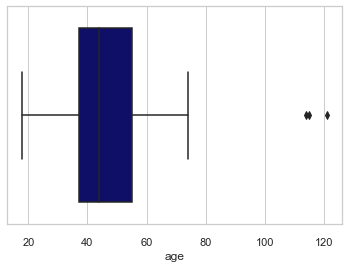

In [3560]:
sns.boxplot(df["age"])

In [3561]:
df.loc[df['age'] == 121]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
239,2n Cycle,Single,6018200.00%,0,1,17-05-2014,23,8,0,5,...,2,4,0,0,0,0,0,0,0,121


In [3562]:
df.drop([239], axis=0, inplace=True)

In [3563]:
max(df["age"])

115

In [3564]:
df.loc[df['age'] == 115]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
339,PhD,Together,8353200.00%,0,0,26-09-2013,36,755,144,562,...,4,1,0,0,1,0,0,0,0,115


In [3565]:
df.drop([339], axis=0, inplace=True)

In [3566]:
max(df["age"])

114

In [3567]:
df.loc[df['age'] == 114]

,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age
192,2n Cycle,Divorced,3664000.00%,1,0,26-09-2013,99,15,6,8,...,2,5,0,0,0,0,0,1,0,114


In [3568]:
df.drop([192], axis=0, inplace=True)

In [3569]:
max(df["age"])

74

### convert "dt_customer" to datetime

In [3570]:
type(df["dt_customer"][0])

str

def date(datestr="", format="%d-%m-%Y"):
    from datetime import datetime
    if not datestr:
        return datetime.today().date()
    return datetime.strptime(datestr, format).date()

In [3571]:
df["dt_customer"] = pd.to_datetime(df["dt_customer"], format="%d-%m-%Y")

### create "cust_since" column + drop "dt_customer"

In [3572]:
#Convert datetime column/series to month
df['cust_since'] = df['dt_customer'].dt.month

In [3573]:
df['cust_since']

0        9
1        3
2        8
3        2
4        1
        ..
2235     6
2236     6
2237     1
2238     1
2239    10
Name: cust_since, Length: 2213, dtype: int64

In [3574]:
df["cust_since"] = (max(df["dt_customer"]) - df["dt_customer"]).astype('timedelta64[M]')

In [3575]:
df["cust_since"] = df["cust_since"].astype("Int64")

In [3576]:
df[["cust_since", "dt_customer"]]

,cust_since,dt_customer
0,21,2012-09-04
1,3,2014-03-08
2,10,2013-08-21
3,4,2014-02-10
4,5,2014-01-19
...,...,...
2235,12,2013-06-13
2236,0,2014-06-10
2237,5,2014-01-25
2238,5,2014-01-24


In [3577]:
df.drop(["dt_customer"],axis=1, inplace=True)

### clean education column

In [3578]:
df["education"].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [3579]:
def clean_edu(x):
    if x in ['Basic', '2n Cycle']:
        return "0"
    elif x in ['Graduation']:
        return "1"
    elif x in ['Master', 'PhD']:
        return "2"

In [3580]:
df['education'] = list(map(clean_edu, df['education']))

In [3581]:
df['education'] = df['education'].astype(int)

### convert "income" to int

In [3582]:
max(df["income"])

666666.0

In [3583]:
df.loc[df['income'] == 666666.0]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cust_since
2233,1,Together,66666600.00%,1,0,23,9,14,18,8,...,6,0,0,0,0,0,0,0,37,12


In [3584]:
df.drop([2233], axis=0, inplace=True)

In [3585]:
df["income"] = df["income"].astype("Int64")

### clean "marital_status"

In [3586]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [3587]:
df.loc[df['marital_status'] == "YOLO"]

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,response,age,cust_since
2177,2,YOLO,48432,0,1,3,322,3,50,4,...,8,0,0,0,0,0,0,0,41,20
2202,2,YOLO,48432,0,1,3,322,3,50,4,...,8,0,0,0,0,0,0,1,41,20


In [3588]:
#remove "YOLO" from "marital_status"
df = df.drop([2177, 2202])

In [3589]:
df["marital_status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd'], dtype=object)

In [3590]:
def clean_marital(x):
    if x in ['Together', 'Married']:
        return "0"
    elif x in ["Single", "Alone", "Widow", "Divorced", 'Absurd']:
        return "1"

In [3591]:
df['marital_status'] = list(map(clean_marital, df['marital_status']))

In [3592]:
df['marital_status'] = df['marital_status'].astype(int)

### new column "children"

In [3593]:
df["children"]= df["kidhome"] + df["teenhome"]

### concatenate campaigns 

In [3594]:
df["acc_camp"] = df["acceptedcmp1"] + df["acceptedcmp2"] + df["acceptedcmp3"] + df["acceptedcmp4"] + df["acceptedcmp5"]

In [3595]:
df["acc_camp"].value_counts()

0    1752
1     322
2      81
3      44
4      11
Name: acc_camp, dtype: int64

In [3596]:
df = df.drop(columns=["acceptedcmp1", "acceptedcmp2","acceptedcmp3", "acceptedcmp4", "acceptedcmp5" ])

In [3597]:
# column "household_size"
# column "total_amount_spent"

### concatenate columns amounts spent 

In [3598]:
df["total_spent"] = df["mntwines"]+ df["mntfruits"]+ df["mntmeatproducts"]+ df["mntfishproducts"]+ df["mntsweetproducts"]+ df["mntgoldprods"]

### creating household size column

In [3599]:
df.dtypes

/opt/anaconda3/envs/DA_ENV/lib/python3.9/site-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


education              int64
marital_status         int64
income                 Int64
kidhome                int64
teenhome               int64
recency                int64
mntwines               int64
mntfruits              int64
mntmeatproducts        int64
mntfishproducts        int64
mntsweetproducts       int64
mntgoldprods           int64
numdealspurchases      int64
numwebpurchases        int64
numcatalogpurchases    int64
numstorepurchases      int64
numwebvisitsmonth      int64
complain               int64
response               int64
age                    int64
cust_since             Int64
children               int64
acc_camp               int64
total_spent            int64
dtype: object

In [3600]:
df["household_size"] = df["marital_status"] + df["children"] + 1

In [3601]:
df.drop(["children"], axis=1, inplace=True)

## plotting

### correlation heatmap

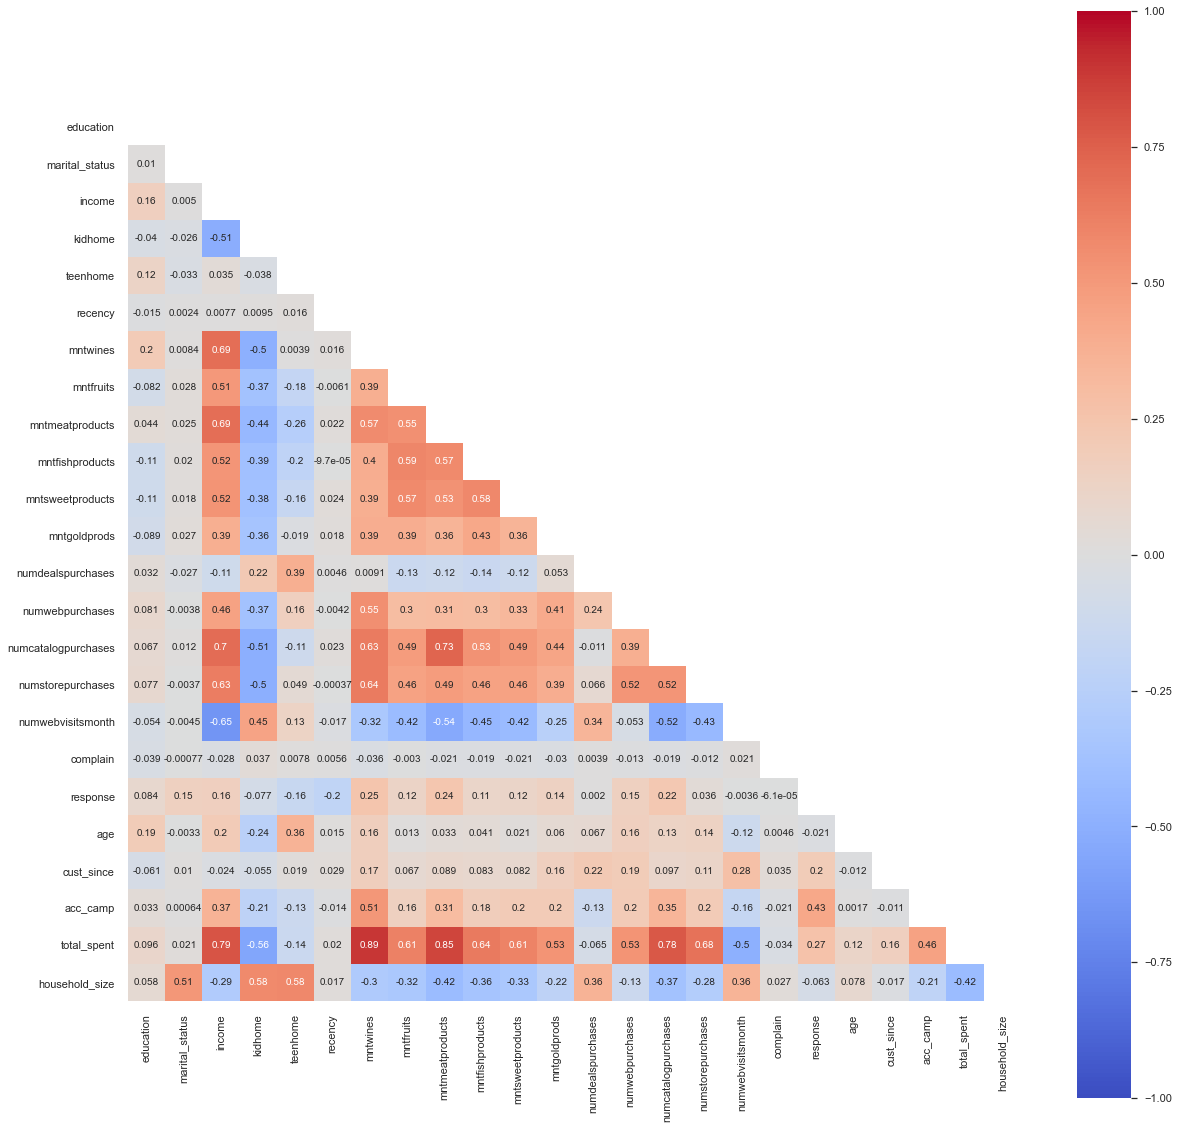

In [3602]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [3603]:
import seaborn as sns
import matplotlib.pyplot as plt

c = abs(df.corr())
#c

#fig, ax = plt.subplots(figsize=(14,14))
#sns.heatmap(c, annot=True);

#c['SalePrice']
c_last = c['income'].sort_values(ascending=False)
#c_last
c_thr = .3
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

df[cols_to_keep]

['total_spent', 'numcatalogpurchases', 'mntmeatproducts', 'mntwines', 'numwebvisitsmonth', 'numstorepurchases', 'mntsweetproducts', 'mntfishproducts', 'kidhome', 'mntfruits', 'numwebpurchases', 'mntgoldprods', 'acc_camp', 'income']


,total_spent,numcatalogpurchases,mntmeatproducts,mntwines,numwebvisitsmonth,numstorepurchases,mntsweetproducts,mntfishproducts,kidhome,mntfruits,numwebpurchases,mntgoldprods,acc_camp,income
0,1617,10,546,635,7,4,88,172,0,88,8,88,0,58138
1,27,1,6,11,5,2,1,2,1,1,1,6,0,46344
2,776,2,127,426,4,10,21,111,0,49,8,42,0,71613
3,53,0,20,11,6,4,3,10,1,4,2,5,0,26646
4,422,3,118,173,5,6,27,46,1,43,5,15,0,58293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1341,3,182,709,5,4,118,42,0,43,9,247,0,61223
2236,444,2,30,406,7,5,0,0,2,0,8,8,1,64014
2237,1241,3,217,908,6,13,12,32,0,48,2,24,1,56981
2238,843,5,214,428,3,10,30,80,0,30,6,61,0,69245


In [3604]:
df.describe()

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,total_spent,household_size
count,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,...,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%,221000.00%
mean,126.74%,35.38%,5196200.23%,44.21%,50.54%,4906.11%,30527.24%,2635.07%,16713.57%,3767.92%,...,267.38%,580.63%,531.90%,0.90%,15.02%,4509.00%,1111.31%,29.86%,60743.39%,230.14%
std,65.13%,47.83%,2153676.02%,53.70%,54.43%,2892.31%,33747.52%,3975.58%,22432.83%,5478.75%,...,292.84%,325.24%,242.54%,9.47%,35.74%,1170.62%,663.37%,67.98%,60276.08%,87.19%
min,0.00%,0.00%,173000.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,...,0.00%,0.00%,0.00%,0.00%,0.00%,1800.00%,0.00%,0.00%,500.00%,100.00%
25%,100.00%,0.00%,3520850.00%,0.00%,0.00%,2400.00%,2400.00%,200.00%,1600.00%,300.00%,...,0.00%,300.00%,300.00%,0.00%,0.00%,3700.00%,500.00%,0.00%,6900.00%,200.00%
50%,100.00%,0.00%,5138150.00%,0.00%,0.00%,4900.00%,17450.00%,800.00%,6800.00%,1200.00%,...,200.00%,500.00%,600.00%,0.00%,0.00%,4400.00%,1100.00%,0.00%,39650.00%,200.00%
75%,200.00%,100.00%,6848700.00%,100.00%,100.00%,7400.00%,50500.00%,3300.00%,23275.00%,5000.00%,...,400.00%,800.00%,700.00%,0.00%,0.00%,5500.00%,1700.00%,0.00%,104800.00%,300.00%
max,200.00%,100.00%,16239700.00%,200.00%,200.00%,9900.00%,149300.00%,19900.00%,172500.00%,25900.00%,...,2800.00%,1300.00%,2000.00%,100.00%,100.00%,7400.00%,2200.00%,400.00%,252500.00%,500.00%


### histograms

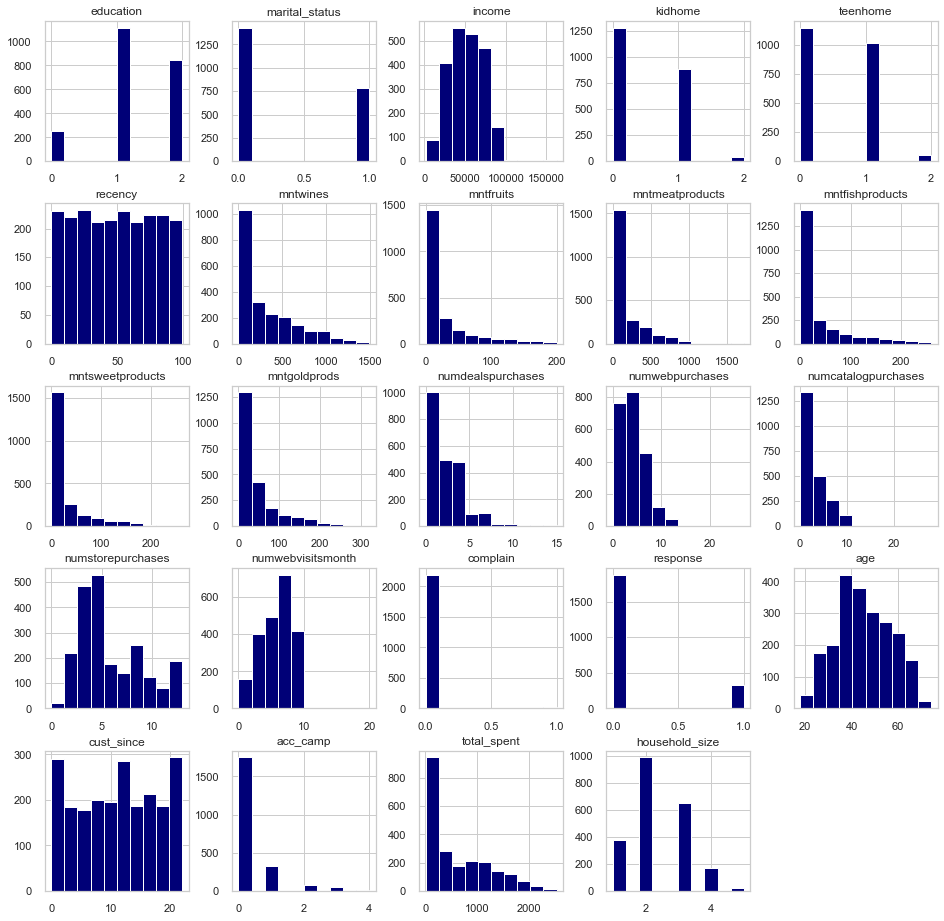

In [3605]:
df.hist(figsize=(16,16))
plt.show()

## preprocessing for modeling

### encode categorical features

In [3606]:
# heatmap to show mean of each feature in the cluster
from sklearn.preprocessing import OneHotEncoder

In [3607]:
df["marital_status"]=pd.get_dummies(df["marital_status"], drop_first=True)

In [3608]:
df["marital_status"]

0       1
1       1
2       0
3       0
4       0
       ..
2235    0
2236    0
2237    1
2238    0
2239    0
Name: marital_status, Length: 2210, dtype: uint8

### Standard scaler

In [3609]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)
df_scaled_df = pd.DataFrame(df_scaled, columns = df.columns)
display(df.head())
print()
display(df_scaled_df.head())

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,total_spent,household_size
0,1,1,58138,0,0,58,635,88,546,172,...,10,4,7,0,1,57,21,0,1617,2
1,1,1,46344,1,1,38,11,1,6,2,...,1,2,5,0,0,60,3,0,27,4
2,1,0,71613,0,0,26,426,49,127,111,...,2,10,4,0,0,49,10,0,776,1
3,1,0,26646,1,0,26,11,4,20,10,...,0,4,6,0,0,30,4,0,53,2
4,2,0,58293,1,0,94,173,43,118,46,...,3,6,5,0,0,33,5,0,422,2


,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,total_spent,household_size
0,-41.07%,135.13%,28.68%,-82.34%,-92.88%,30.91%,97.73%,155.10%,168.93%,245.22%,...,250.23%,-55.55%,69.32%,-9.56%,237.84%,101.76%,149.07%,-43.94%,167.53%,-34.57%
1,-41.07%,135.13%,-26.09%,103.91%,90.88%,-38.25%,-87.22%,-63.78%,-71.85%,-65.14%,...,-57.17%,-117.06%,-13.16%,-9.56%,-42.05%,127.40%,-122.33%,-43.94%,-96.32%,194.87%
2,-41.07%,-74.00%,91.26%,-82.34%,-92.88%,-79.75%,35.78%,56.98%,-17.90%,133.86%,...,-23.01%,128.97%,-54.40%,-9.56%,-42.05%,33.41%,-16.78%,-43.94%,27.97%,-149.29%
3,-41.07%,-74.00%,-117.57%,103.91%,-92.88%,-79.75%,-87.22%,-56.23%,-65.60%,-50.53%,...,-91.32%,-55.55%,28.08%,-9.56%,-42.05%,-128.94%,-107.25%,-43.94%,-92.00%,-34.57%
4,112.51%,-74.00%,29.40%,103.91%,-92.88%,155.41%,-39.20%,41.89%,-21.91%,15.19%,...,11.14%,5.96%,-13.16%,-9.56%,-42.05%,-103.30%,-92.17%,-43.94%,-30.77%,-34.57%


## Clustering using  PCA

from sklearn.decomposition import PCA

pca = PCA(svd_solver='full')

pca.fit(df_scaled_df)

df_scaled_df = pca.transform(df_scaled_df)

cols = [ 'PCA_' + str(i) for i in list(range(1,len(df.columns)+1))]

df_scaled_df = pd.DataFrame(df_scaled_df, columns = cols)

df_scaled_df= df_scaled_df.iloc[:,:11]
df_scaled_df

### Getting Variances

print(pca.explained_variance_ratio_)

variances = pca.explained_variance_ratio_.tolist()

total_variance = [sum(variances[:i]) for i in range(1, len(variances)+1)]
scree = pd.DataFrame({'num_pca': range(1,len(variances)+1),'variance': variances,'cum_variance': total_variance})
scree.head(22)

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("darkgrid", {"axes.facecolor": ".9"})

fig, ax = plt.subplots(1,2,figsize=(16,8))

sns.lineplot(x="num_pca", y="variance", data=scree, ax = ax[0], color = 'black')
ax[0].set_xticks(range(1,32))
sns.barplot(x="num_pca", y="cum_variance", data=scree, ax = ax[1], color = 'lightblue')

### Getting the PCA coefficients

pca.components_

for comp in range(1,len(pca.components_)+1):
    print("Principal component ",comp)
    my_list = [(abs(value),index+1,df.columns[index],value) for index,value in enumerate(pca.components_[comp-1,:]) ]
    my_list.sort(reverse=True)
    my_list = [(elem[1],elem[2],round(elem[3],2)) for elem in my_list]
    print(my_list)
    print()

In [3610]:
df

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,total_spent,household_size
0,1,1,58138,0,0,58,635,88,546,172,...,10,4,7,0,1,57,21,0,1617,2
1,1,1,46344,1,1,38,11,1,6,2,...,1,2,5,0,0,60,3,0,27,4
2,1,0,71613,0,0,26,426,49,127,111,...,2,10,4,0,0,49,10,0,776,1
3,1,0,26646,1,0,26,11,4,20,10,...,0,4,6,0,0,30,4,0,53,2
4,2,0,58293,1,0,94,173,43,118,46,...,3,6,5,0,0,33,5,0,422,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,0,61223,0,1,46,709,43,182,42,...,3,4,5,0,0,47,12,0,1341,2
2236,2,0,64014,2,1,56,406,0,30,0,...,2,5,7,0,0,68,0,1,444,4
2237,1,1,56981,0,0,91,908,48,217,32,...,3,13,6,0,0,33,5,1,1241,2
2238,2,0,69245,0,1,8,428,30,214,80,...,5,10,3,0,0,58,5,0,843,2


## Clustering using K-Means

In [3611]:
kmeans = KMeans(n_clusters=6, init="k-means++", random_state=1234)
kmeans.fit(df_scaled_df)

KMeans(n_clusters=6, random_state=1234)

In [3612]:
kmeans.labels_

array([2, 3, 2, ..., 2, 1, 3], dtype=int32)

### K-Means Scatterplot Example

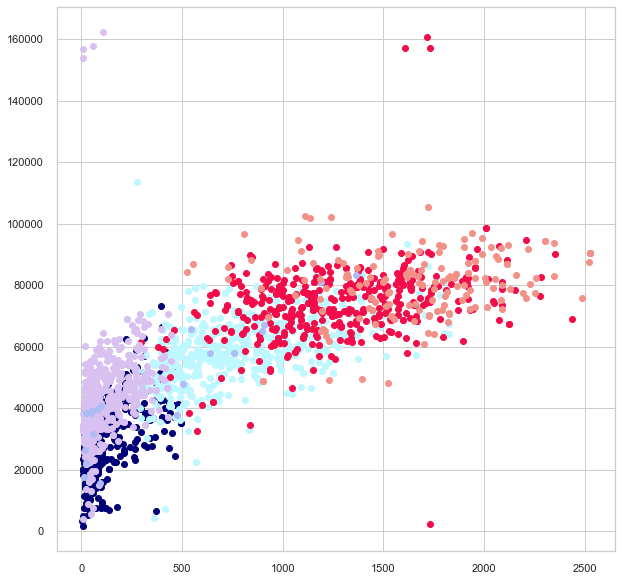

In [3613]:
# assign a cluster to each example
labels = kmeans.predict(df_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
plt.figure(figsize=(10, 10))
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples (2="income", 22="total_spent", 6="mntwine")
    pyplot.scatter(df.to_numpy()[row_ix, 22], df.to_numpy()[row_ix, 2],linewidths=1)
pyplot.show()

In [3614]:
clusters = kmeans.predict(df_scaled_df)
pd.Series(clusters).value_counts().sort_index()

0    590
1    516
2    425
3    499
4     20
5    160
dtype: int64

In [3615]:
df["cluster"] = clusters

In [3616]:
df[df['cluster'] == 2].sample()

,education,marital_status,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,...,numstorepurchases,numwebvisitsmonth,complain,response,age,cust_since,acc_camp,total_spent,household_size,cluster
1350,2,0,76542,0,0,91,794,73,573,0,...,10,2,0,0,58,14,0,1483,1,2


In [3617]:
kmeans.inertia_

30612.35357274959

In [3618]:
kmeans2 = KMeans(n_clusters=6,
                init="k-means++",
                n_init=50,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(df_scaled_df)
print(kmeans2.inertia_)

30612.35357274959


### Elbow method

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

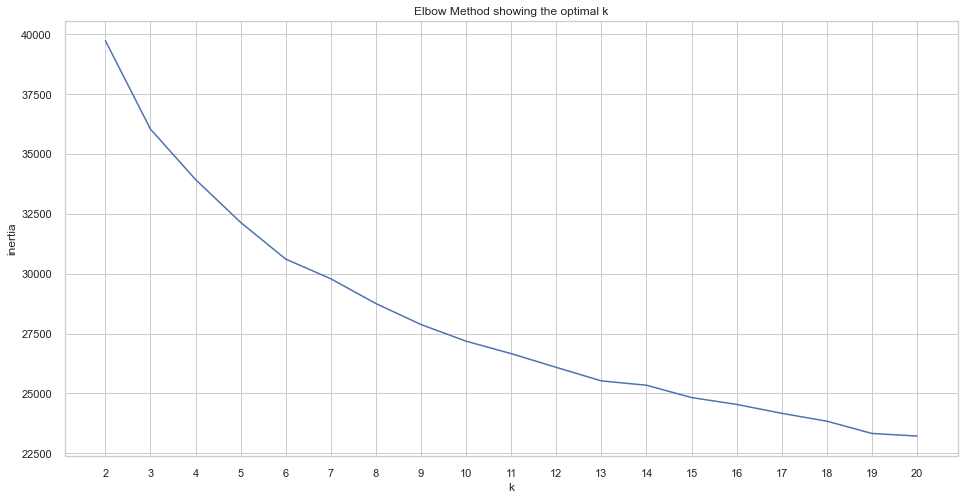

In [3619]:
K = range(2, 21)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silhouette method

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

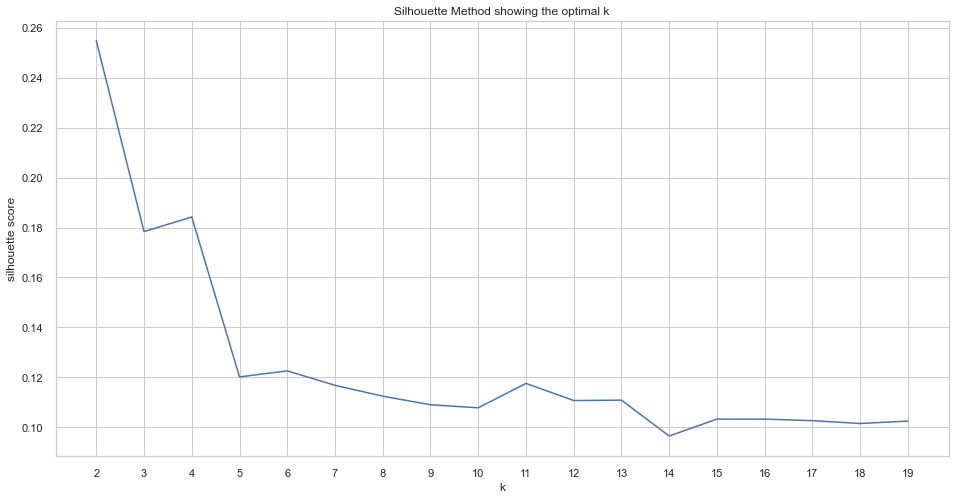

In [3620]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_scaled_df)
    
   
    
    silhouette.append(silhouette_score(df_scaled_df, kmeans.predict(df_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

### visualize Silhouette

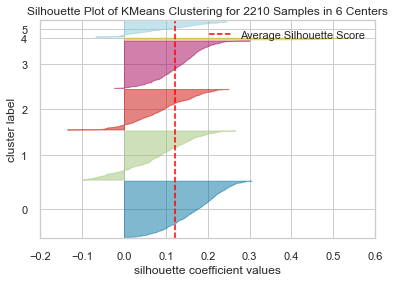

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2210 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [3621]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(6, random_state=1234)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(df_scaled_df)        
visualizer.show()       

### Ninas Heatmap

In [3622]:
df = df.reset_index(drop=True)

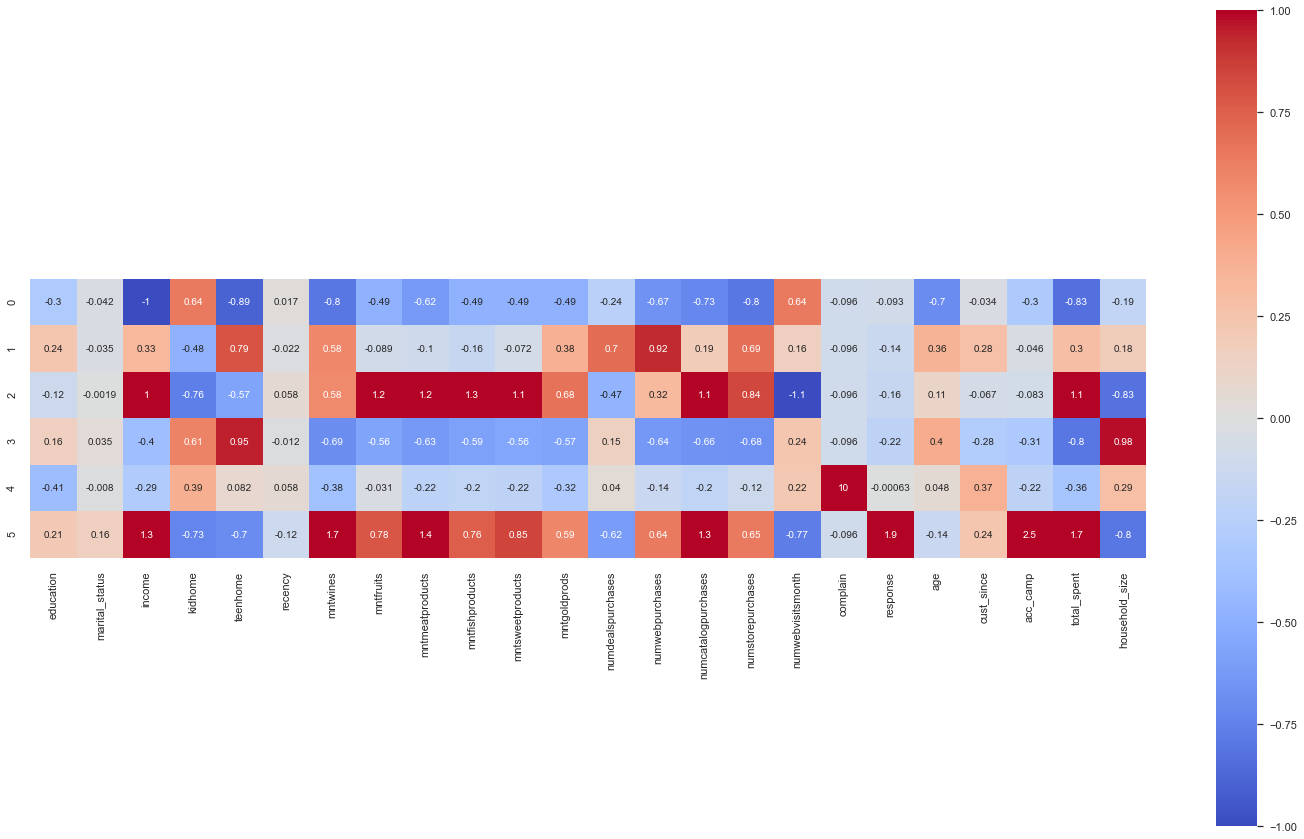

In [3623]:
#create dictionary of cluster membership for each label
cluster_labels = np.unique(df.cluster)
cluster_members = {}
for clusters in cluster_labels:
    cluster_members[clusters] = np.where(df.cluster == clusters)

#for each cluster label (ky) calculate the mean for each feature
scaled_feature_means_by_cluster = pd.DataFrame([df_scaled_df.loc[cluster_members[ky]].mean(numeric_only=True) for ky in cluster_members.keys()])

#plot results as heatmap 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(25, 15))
    ax = sns.heatmap(scaled_feature_means_by_cluster, cmap='coolwarm', vmin=-1, vmax=1, annot=True, square=True)


## Describing + plotting Clusters 

### Save df as excel file

In [3624]:
df.to_excel(r'df_clean2.xlsx', index = False)

In [3625]:
df.to_csv(r'df_clean2.csv', index = False)

### exclude cluster 4

In [3626]:
df = df.drop(df[df.cluster == 4].index)
df["cluster"].value_counts()

0    590
1    516
3    499
2    425
5    160
Name: cluster, dtype: int64

### Create custom color palette for seaborn

In [3627]:
#array with colours (dark blue: 000077, Blau: AEBBF4, light blue: BDF7FF, Lila: D8C1F1, red: F20C49, coral: F29188)
colors = ["#000077","#BDF7FF","#F20C49", "#D8C1F1", "#AEBBF4","#F29188"]
customPalette = sns.set_palette(sns.color_palette(colors))

## Features plotted by Clusters

### Education by Cluster

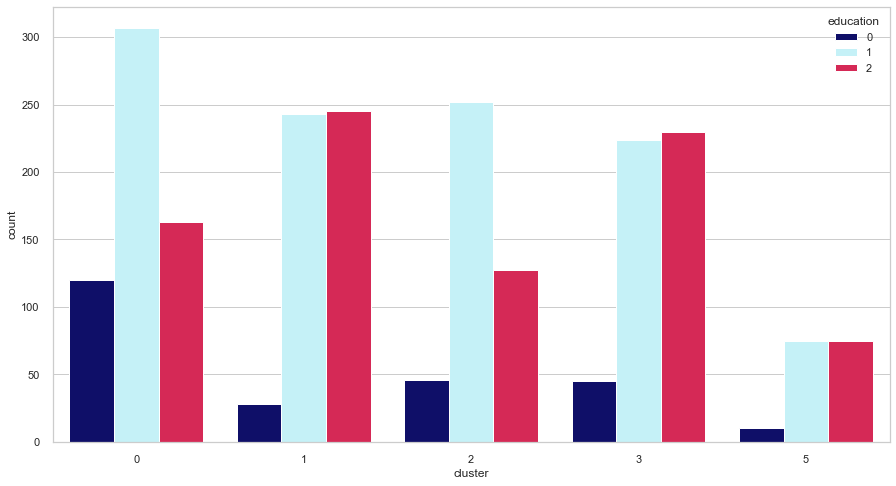

In [3628]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["education"], palette=sns.color_palette(customPalette, 3))

### Marital Status by Cluster

Text(0.5, 1.0, 'Marital Status by Cluster')

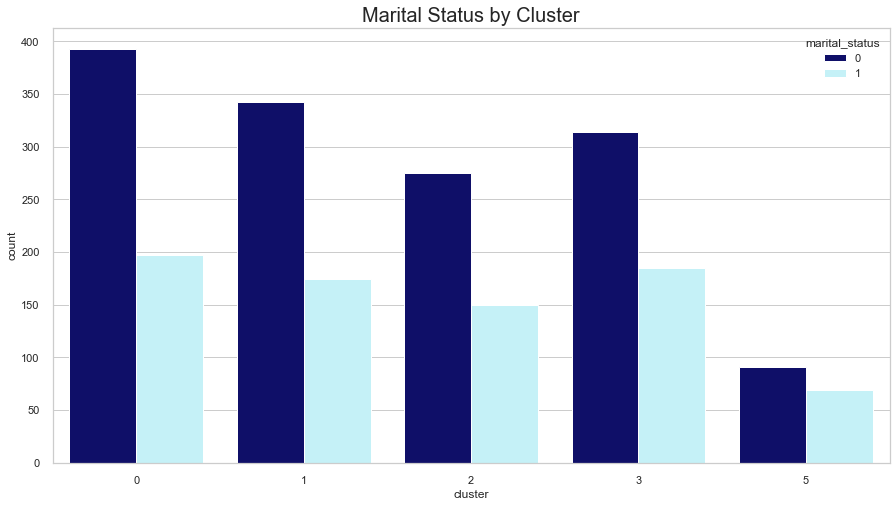

In [3629]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["marital_status"], palette=sns.color_palette(customPalette, 2))
plt.title('Marital Status by Cluster', fontsize=20)

### Income by Cluster

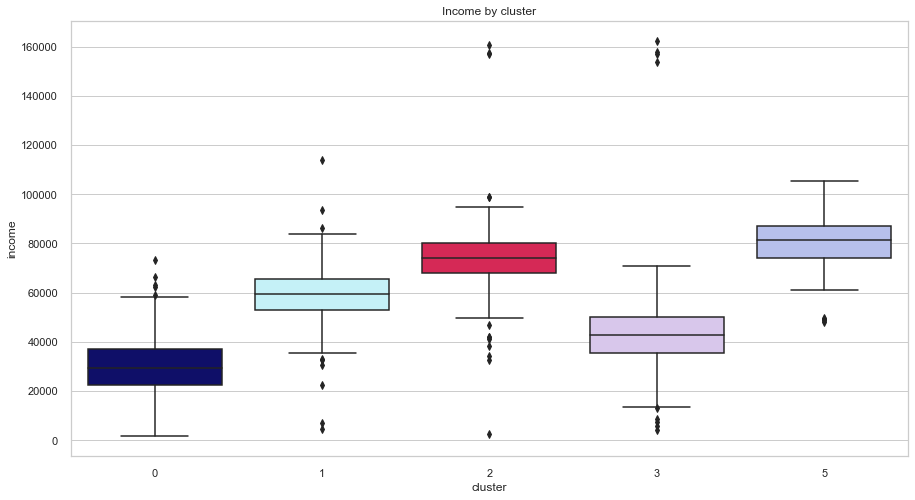

In [3630]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["income"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Income by cluster")
plt.show()

### Children by Cluster

<Figure size 1440x1440 with 0 Axes>

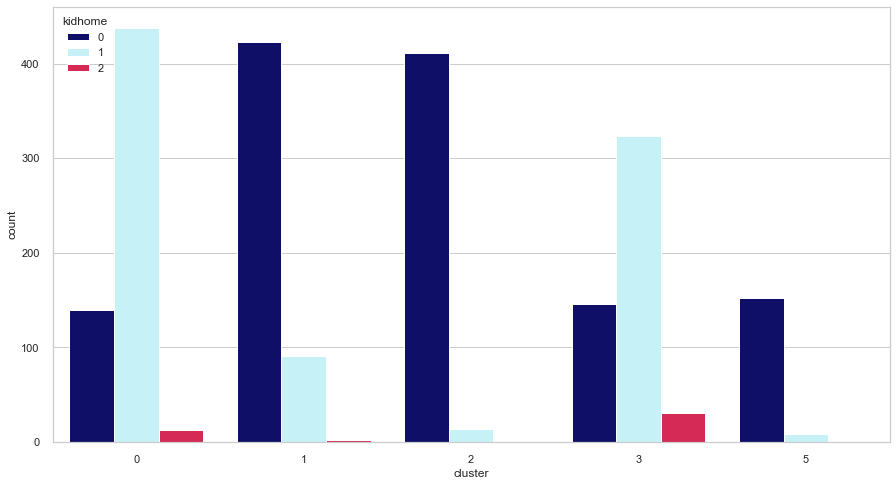

<Figure size 1440x1440 with 0 Axes>

In [3631]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["kidhome"], palette=sns.color_palette(customPalette, 3))
plt.figure(figsize=(20,20))

### Teenagers by Cluster

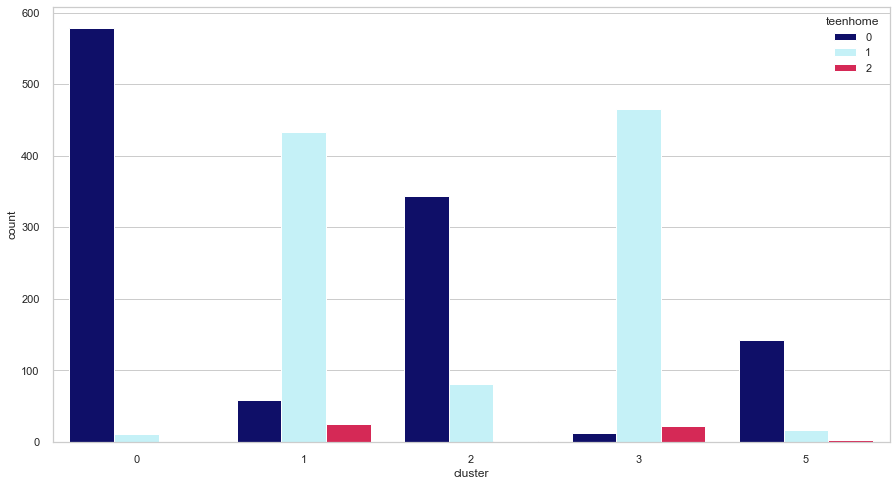

In [3632]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["teenhome"], palette=sns.color_palette(customPalette, 3))

### Recency by Cluster

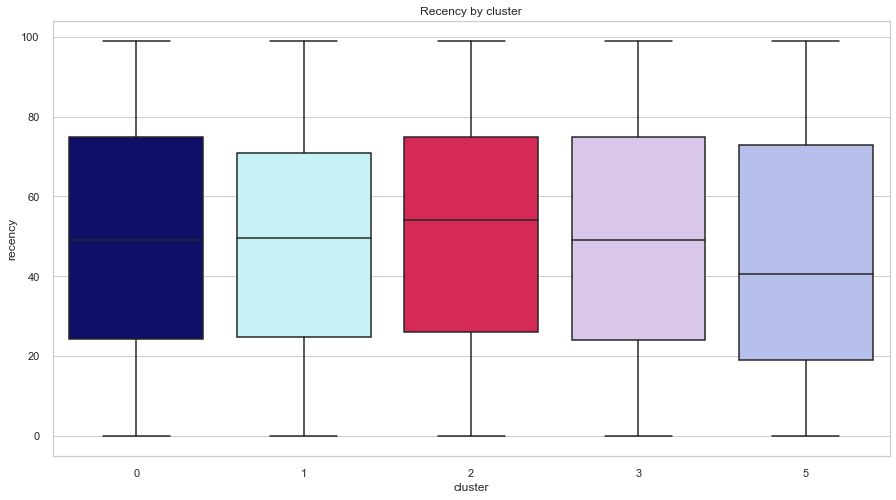

In [3633]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["recency"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Recency by cluster")
plt.show()

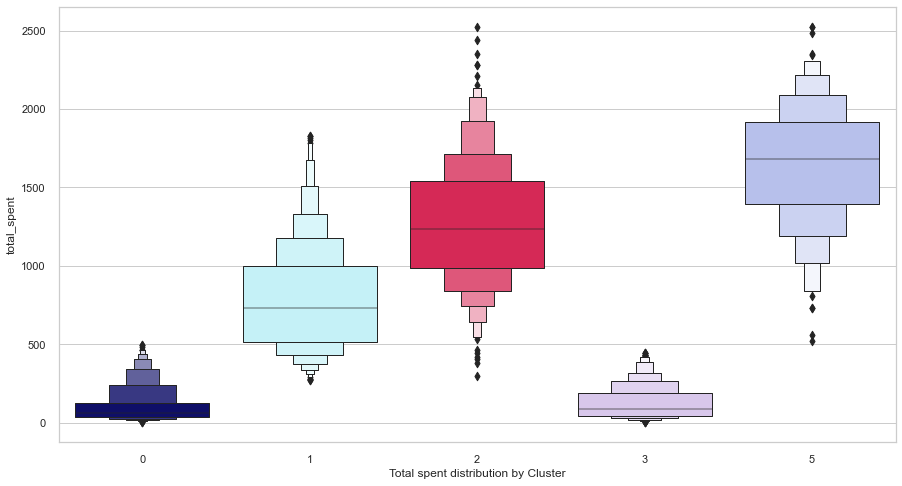

In [3634]:
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["total_spent"], palette=customPalette)
pl.set_xlabel("Total spent distribution by Cluster")
plt.show()

### Wines by Cluster

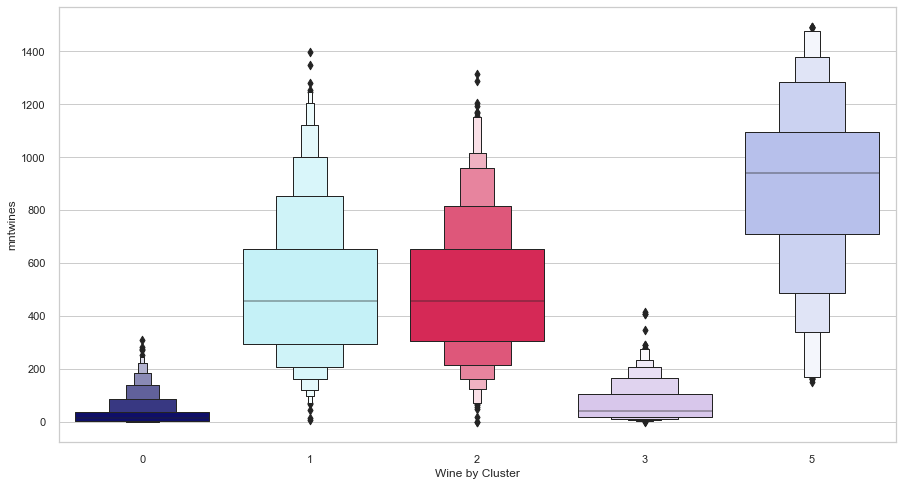

In [3635]:
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntwines"], palette=customPalette)
pl.set_xlabel("Wine by Cluster")
plt.show()

### Fruit by Cluster

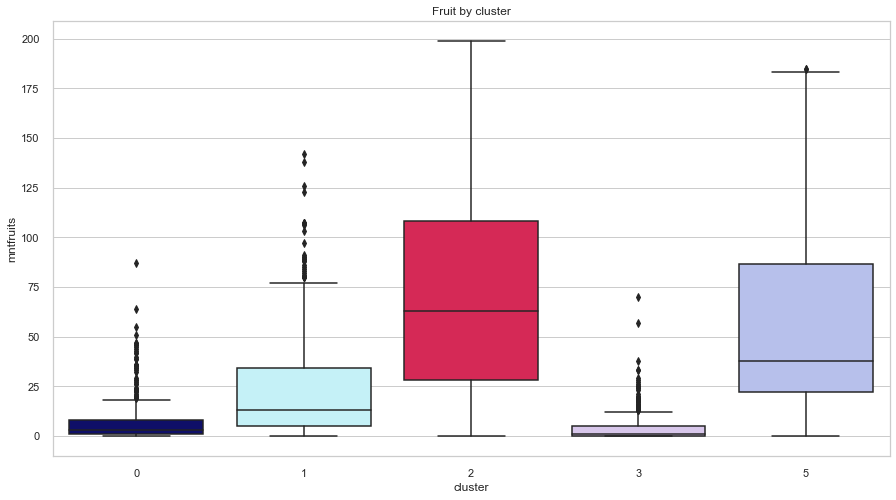

In [3636]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["mntfruits"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Fruit by cluster")
plt.show()

### Meat products by Cluster

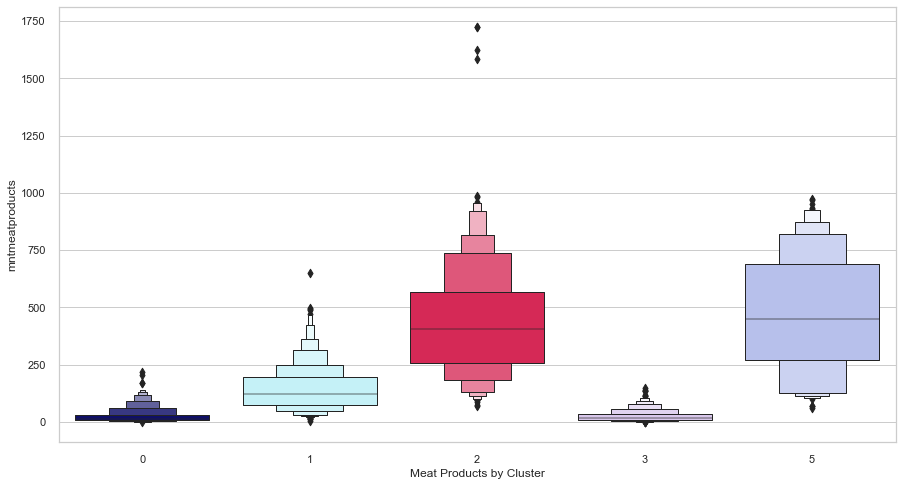

In [3637]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntmeatproducts"], palette=customPalette)
pl.set_xlabel("Meat Products by Cluster")
plt.show()

### Fish Products by Cluster

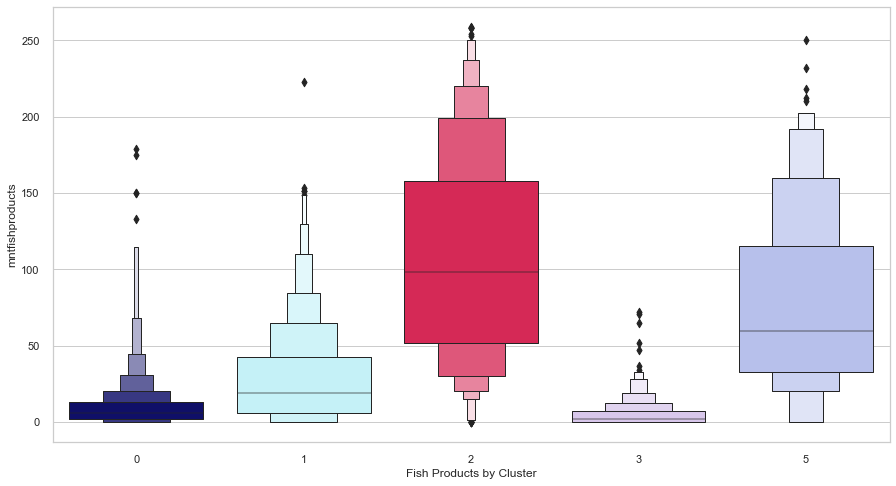

In [3638]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntfishproducts"], palette=customPalette)
pl.set_xlabel("Fish Products by Cluster")
plt.show()

### Sweet Products by Cluster

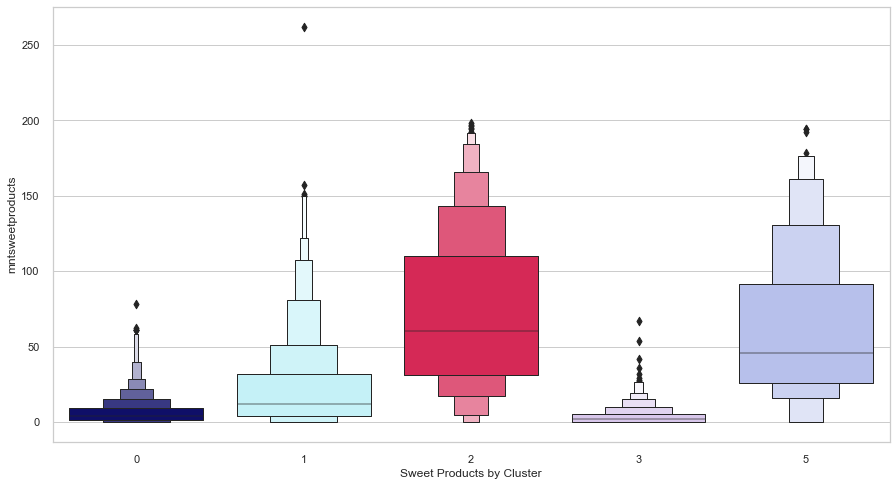

In [3639]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntsweetproducts"], palette=customPalette)
pl.set_xlabel("Sweet Products by Cluster")
plt.show()

### Gold Products by Cluster

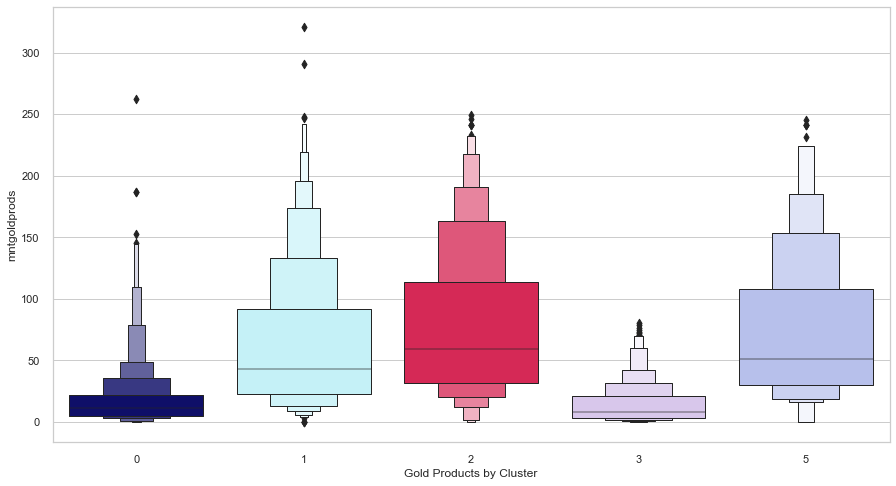

In [3640]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["mntgoldprods"], palette=customPalette)
pl.set_xlabel("Gold Products by Cluster")
plt.show()

### Number of Deals purchased by Cluster

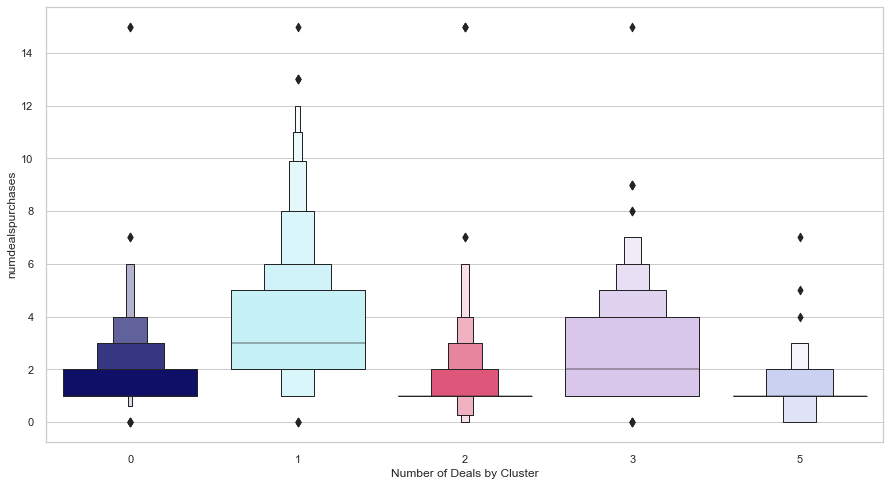

In [3641]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numdealspurchases"], palette=customPalette)
pl.set_xlabel("Number of Deals by Cluster")
plt.show()

### Number of Web Purchases by Cluster

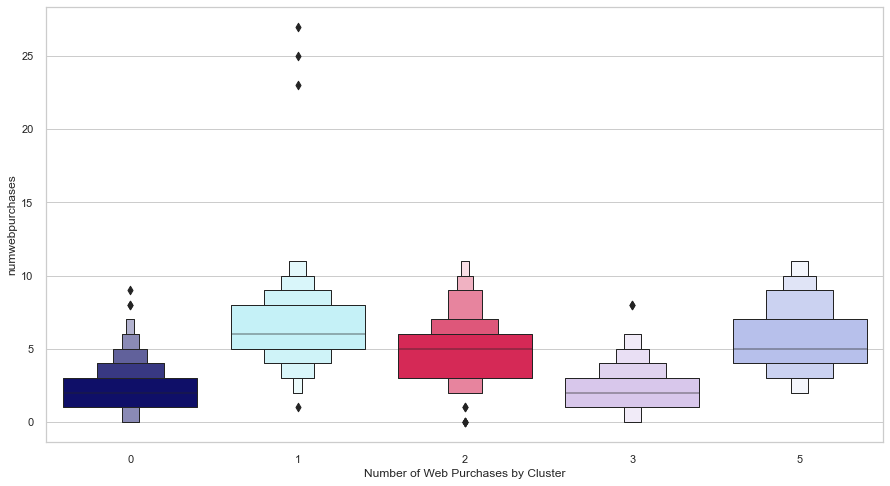

In [3642]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numwebpurchases"], palette=customPalette)
pl.set_xlabel("Number of Web Purchases by Cluster")
plt.show()

### Number of Catalogue Purchases by Cluster

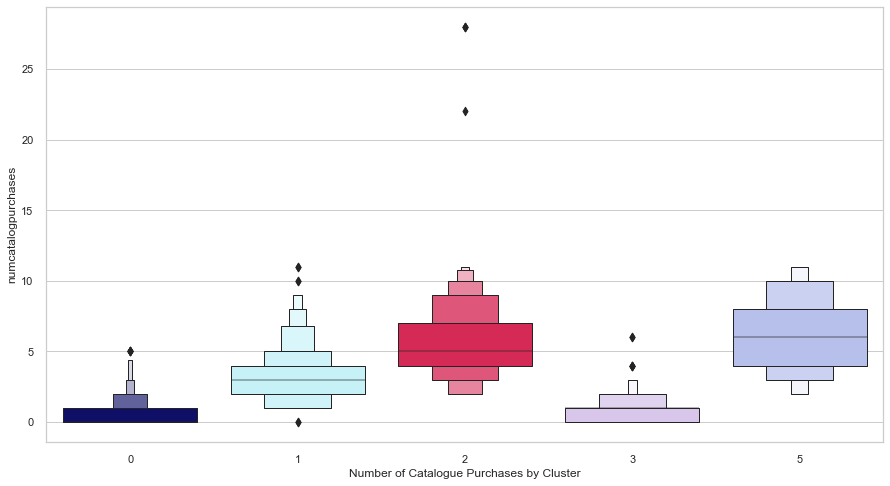

In [3643]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numcatalogpurchases"], palette=customPalette)
pl.set_xlabel("Number of Catalogue Purchases by Cluster")
plt.show()

### Number of Store Purchases by Cluster

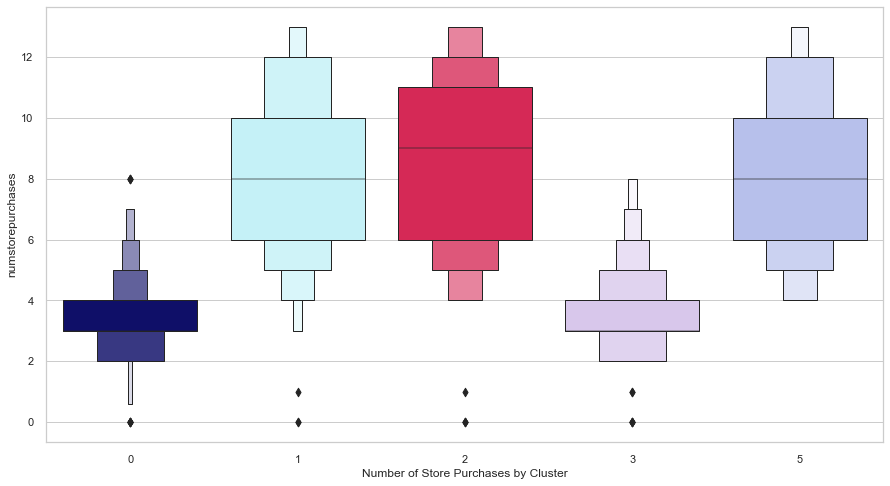

In [3644]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numstorepurchases"], palette=customPalette)
pl.set_xlabel("Number of Store Purchases by Cluster")
plt.show()

### Web Visits by Cluster

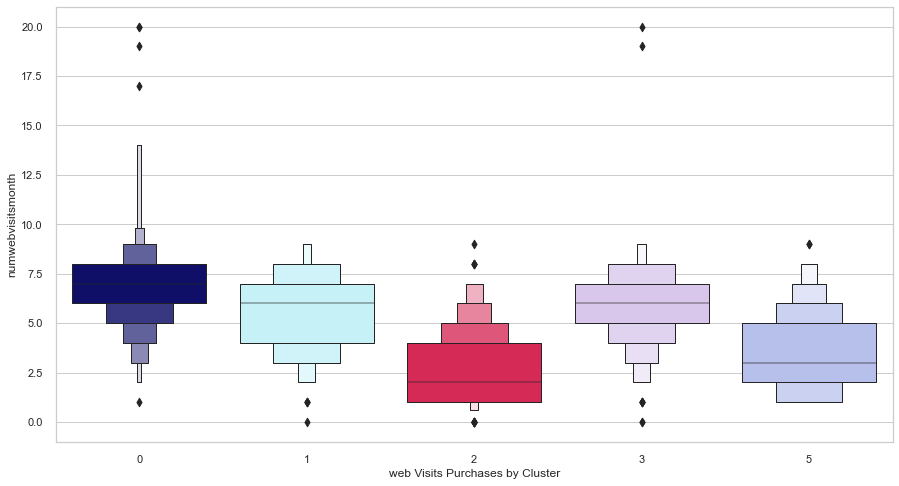

In [3645]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["numwebvisitsmonth"], palette=customPalette)
pl.set_xlabel("web Visits Purchases by Cluster")
plt.show()

### Complaints by Cluster

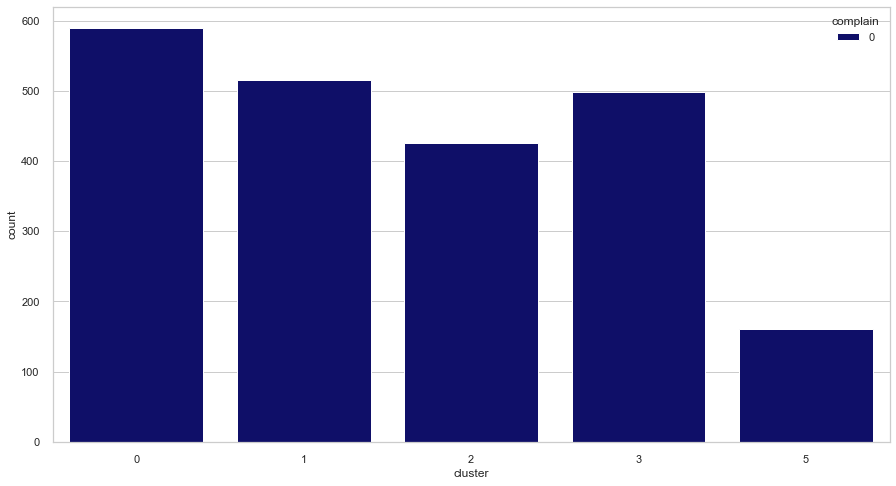

In [3646]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["complain"], palette=sns.color_palette(customPalette, 2))

### Response by Cluster

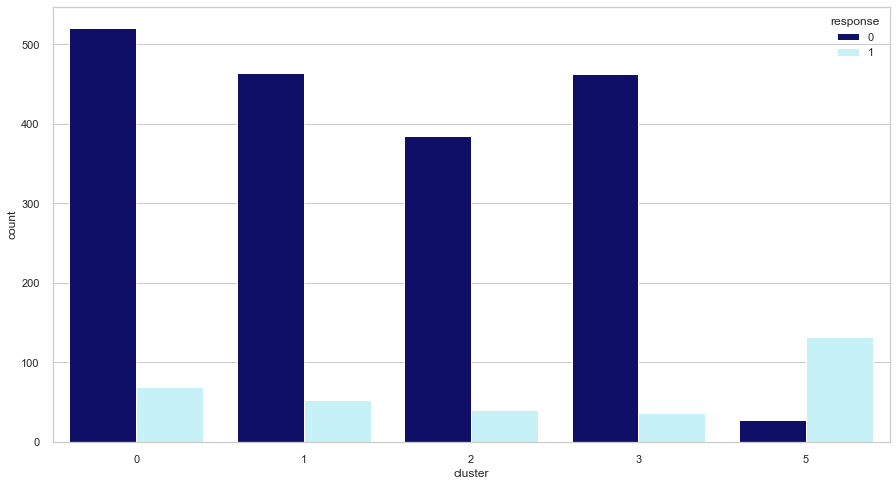

In [3647]:
#Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["response"], palette=sns.color_palette(customPalette, 2))

### Age by Cluster

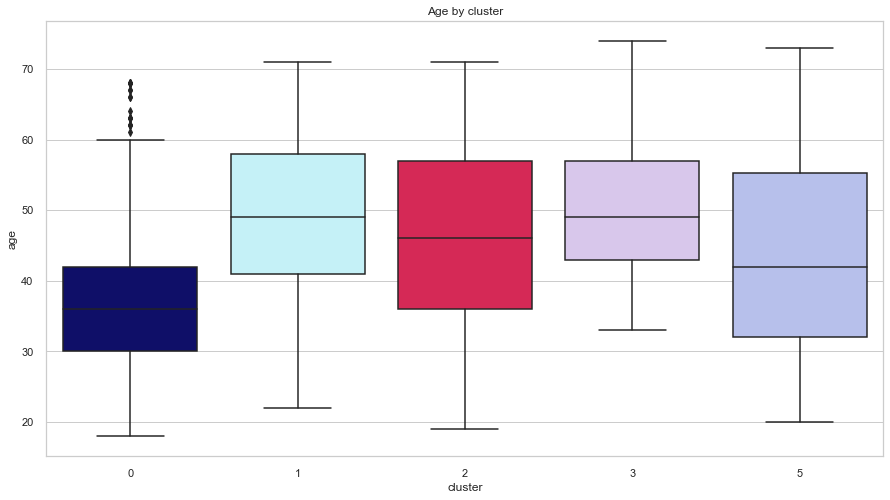

In [3648]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["age"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Age by cluster")
plt.show()

### Accepted Campaigns by Cluster

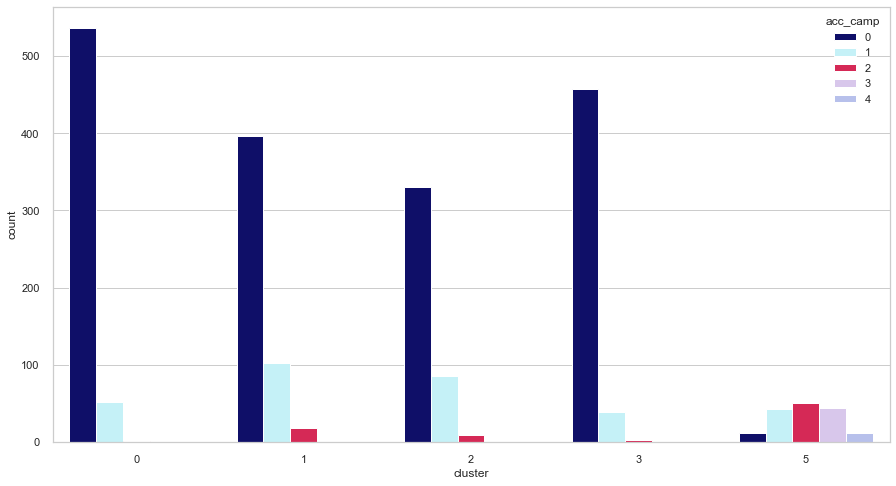

In [3649]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["acc_camp"],palette=sns.color_palette(customPalette, 5))

### Total Amount spent by Cluster

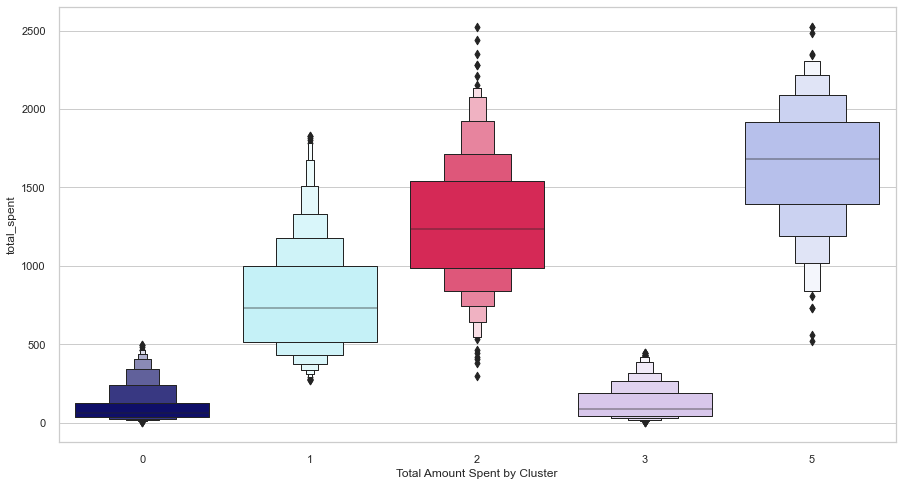

In [3650]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxenplot(x=df["cluster"], y=df["total_spent"], palette=customPalette)
pl.set_xlabel("Total Amount Spent by Cluster")
plt.show()

### Household Size by Cluster

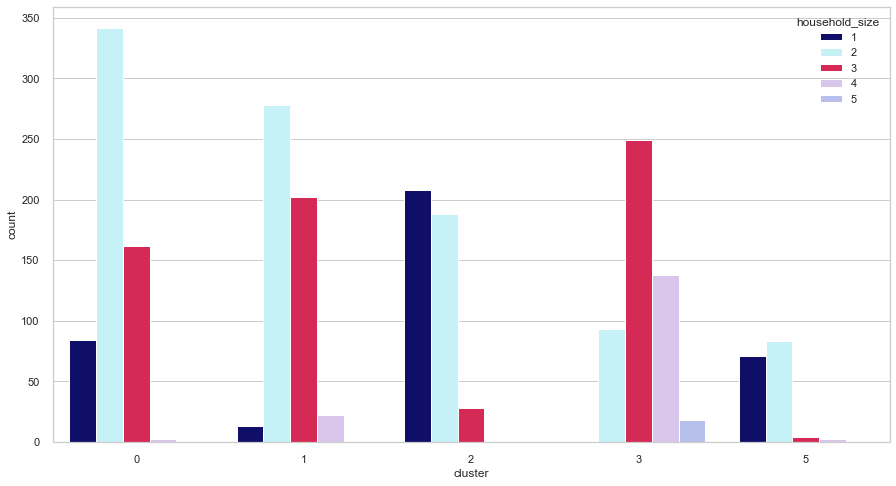

In [3651]:
sns.set_palette(customPalette)
fig, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x = df["cluster"],y = None, hue=df["household_size"], palette=sns.color_palette(customPalette, 6))

### Customer_since by Cluster

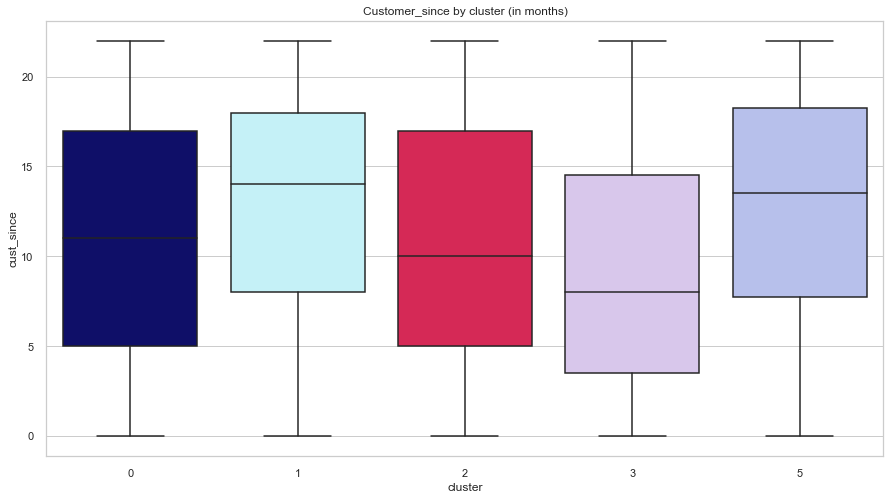

In [3652]:
sns.set_palette(customPalette)
plt.figure(figsize=(15,8))
pl=sns.boxplot(y=df["cust_since"],x=df["cluster"], palette=sns.color_palette(customPalette, 6))
pl.set_title("Customer_since by cluster (in months)")
plt.show()

## Plotting features against each other 

### Wines by Education

<AxesSubplot:xlabel='education', ylabel='mntwines'>

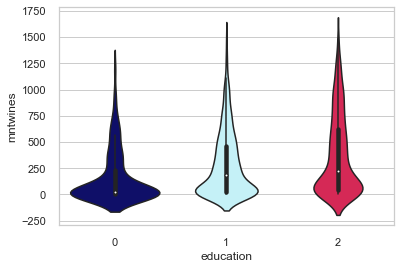

In [3653]:
sns.set_palette(customPalette)
sns.violinplot(x="education", y="mntwines", data=df, palette=sns.color_palette(customPalette, 3))

### Wines by Children

<AxesSubplot:xlabel='kidhome', ylabel='mntwines'>

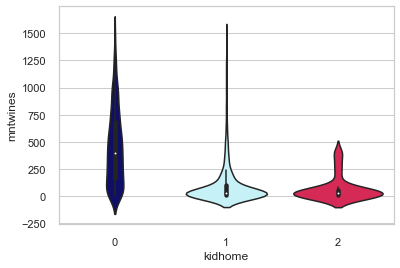

In [3654]:
sns.set_palette(customPalette)
sns.violinplot(x="kidhome", y="mntwines", data=df, palette=sns.color_palette(customPalette, 3))

### Wines by Teenager

<AxesSubplot:xlabel='teenhome', ylabel='mntwines'>

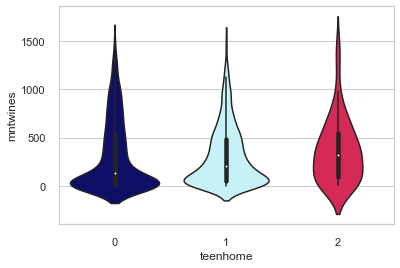

In [3655]:
sns.set_palette(customPalette)
sns.violinplot(x="teenhome", y="mntwines", data=df, palette=sns.color_palette(customPalette, 3))

### Meat Products by Education

<AxesSubplot:xlabel='education', ylabel='mntmeatproducts'>

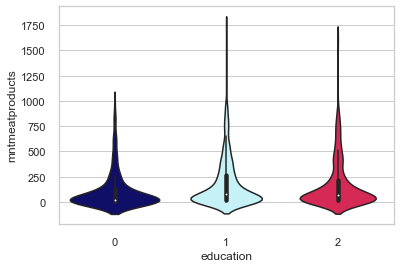

In [3656]:
sns.set_palette(customPalette)
sns.violinplot(x="education", y="mntmeatproducts", data=df, palette=sns.color_palette(customPalette, 3))

### Fish Products by Education

<AxesSubplot:xlabel='education', ylabel='mntfishproducts'>

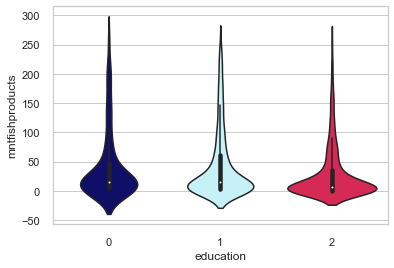

In [3657]:
sns.set_palette(customPalette)
sns.violinplot(x="education", y="mntfishproducts", data=df, palette=sns.color_palette(customPalette, 3))

## RFM Analysis

RFM modelling is a marketing analysis technique used to assess customer value. The RFM model is based on three factors:
- Recency = the interval between the last action and today
- Frequency = the number of actions between the user’s signup date and today
- Monetary value = the sum of revenue within the user’s lifetime

### create new df and columns for RFM

In [3658]:
#create frequency column
df["frequency"] = df["numcatalogpurchases"] + df["numstorepurchases"] + df["numwebpurchases"]
df["frequency"]

0       22
1        4
2       20
3        6
4       14
        ..
2205    16
2206    15
2207    18
2208    21
2209     8
Name: frequency, Length: 2190, dtype: int64

In [3659]:
#create new df 
rfm_df = df.filter(['recency','frequency','total_spent'], axis=1)

In [3660]:
#rename "total_spent" column
rfm_df.rename({'total_spent':'monetary'}, axis=1, inplace=True)

### get quartiles

In [3661]:
#calculate quartiles
quartiles = rfm_df.quantile([0.25, 0.5, 0.75])

In [3662]:
#save quartiles in dictionary
quantiles.to_dict()

{'recency': {0.25: 24.0, 0.5: 49.0, 0.75: 74.0},
 'frequency': {0.25: 6.0, 0.5: 12.0, 0.75: 18.75},
 'monetary': {0.25: 69.0, 0.5: 396.5, 0.75: 1048.0}}

In [3663]:
#Recency Score (x = value, p = recency, monetary_value, frequency, q = quartiles dict)
def rscore(x,p,q):
    if x <= q[p][0.25]:
        return 1
    elif x <= q[p][0.50]:
        return 2
    elif x <= q[p][0.75]: 
        return 3
    else:
        return 4

#Frequency + Monetary Score
def fmscore(x,p,q):
    if x <= q[p][0.25]:
        return 4
    elif x <= q[p][0.50]:
        return 3
    elif x <= q[p][0.75]: 
        return 2
    else:
        return 1

### RFM segmentation table

In [3664]:
#combine scores to create a single score 
rfm_df['r_quartile'] = rfm_df['recency'].apply(rscore, args=('recency',quantiles,))
rfm_df['f_quartile'] = rfm_df['frequency'].apply(fmscore, args=('frequency',quantiles,))
rfm_df['m_quartile'] = rfm_df['monetary'].apply(fmscore, args=('monetary',quantiles,))

In [3665]:
rfm_df['rfmscore'] = rfm_df.r_quartile.map(str) \
                            + rfm_df.f_quartile.map(str) \
                            + rfm_df.m_quartile.map(str)
rfm_df.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfmscore
0,58,22,1617,3,1,1,311
1,38,4,27,2,4,4,244
2,26,20,776,2,1,2,212
3,26,6,53,2,4,4,244
4,94,14,422,4,2,2,422


In [3666]:
rfm_df.sort_values(by=['rfmscore', 'monetary'], ascending=[True, False])

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,rfmscore
1438,16,25,2349,1,1,1,111
474,11,19,2092,1,1,1,111
1933,2,22,2092,1,1,1,111
1652,20,21,2091,1,1,1,111
1068,16,19,2087,1,1,1,111
...,...,...,...,...,...,...,...
167,96,3,10,4,4,4,444
406,75,3,10,4,4,4,444
851,80,3,10,4,4,4,444
2106,85,0,8,4,4,4,444


In [3667]:
rfm_df.groupby('rfmscore').agg('monetary').mean()

rfmscore
111   149686.49%
112    84318.18%
113    31800.00%
121   143205.45%
122    57813.64%
123    38025.00%
131   158100.00%
132    65383.33%
133    21596.67%
134     5825.00%
143     9246.81%
144     3803.01%
211   152989.29%
212    88027.66%
221   148033.33%
222    59396.05%
223    38157.14%
231   160500.00%
232    67233.33%
233    21320.22%
234     6000.00%
243     9010.71%
244     3992.62%
311   149040.00%
312    88661.82%
321   144439.66%
322    62970.41%
323    38083.33%
331   162516.67%
332    70971.43%
333    22652.33%
334     5825.00%
343     9364.44%
344     3710.09%
411   155166.67%
412    82354.90%
421   142972.73%
422    64072.58%
423    37033.33%
431   146666.67%
432    73150.00%
433    20915.48%
434     5183.33%
443     9360.00%
444     4080.43%
Name: monetary, dtype: float64

In [3668]:
rfm_df['Total Score'] = rfm_df['r_quartile'] + rfm_df['f_quartile'] +rfm_df['m_quartile']
print(rfm_df.head(), rfm_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2190 entries, 0 to 2209
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   recency      2190 non-null   int64 
 1   frequency    2190 non-null   int64 
 2   monetary     2190 non-null   int64 
 3   r_quartile   2190 non-null   int64 
 4   f_quartile   2190 non-null   int64 
 5   m_quartile   2190 non-null   int64 
 6   rfmscore     2190 non-null   object
 7   Total Score  2190 non-null   int64 
dtypes: int64(7), object(1)
memory usage: 218.5+ KB
   recency  frequency  monetary  r_quartile  f_quartile  m_quartile rfmscore  \
0       58         22      1617           3           1           1      311   
1       38          4        27           2           4           4      244   
2       26         20       776           2           1           2      212   
3       26          6        53           2           4           4      244   
4       94         14       422 

In [3669]:
rfm_df.groupby('Total Score').agg('monetary').mean().groupby('Total Score').agg('monetary').mean()



AttributeError: 'SeriesGroupBy' object has no attribute 'monetary'

In [ ]:
rfm_df.groupby('Total Score').agg('monetary').mean().plot(kind='bar', colormap='Blues_r')

In [ ]:
rfm_df.groupby('Total Score').agg('frequency').mean().plot(kind='bar', colormap='Blues_r')

In [ ]:
rfm_df.groupby('Total Score').agg('recency').mean().plot(kind='bar', colormap='Blues_r')

In [ ]:
ax=rfm_df.groupby('Total Score').agg(df['response']).mean().plot(kind='bar', colormap='copper_r')
ax.set_xlabel("Total Score")
ax.set_ylabel("Proportion of Responders")

### label customer groups

In [ ]:
print("top customers: ",len(rfm_df[rfm_df['rfmscore']=='444']))
print("loyal customers: ",len(rfm_df[rfm_df['f_quartile']==4]))
print("big spenders: ",len(rfm_df[rfm_df['m_quartile']==4]))
print("new customers: ", len(rfm_df[rfm_df['rfmscore']=='411']))
print("almost lost: ",len(rfm_df[rfm_df['rfmscore']=='144']))
print("lost: ",len(rfm_df[rfm_df['rfmscore']=='111']))

In [ ]:
df["cluster"].value_counts()

## plot RFM elements by Cluster

### Frequency by Cluster

In [ ]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(x=df["cluster"], y=rfm_df["frequency"])
pl.set_title("Frequency by Cluster")
plt.show() 

### Recency by Cluster

In [ ]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(x=df["cluster"], y=rfm_df["recency"])
pl.set_title("Recency by Cluster")
plt.show() 

### Monetary by Cluster

In [ ]:
plt.figure(figsize=(15,8))
pl=sns.boxplot(x=df["cluster"], y=rfm_df["monetary"])
pl.set_title("Monetary by Cluster")
plt.show() 